In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


****Kaggle - Students' Academic Performance Dataset****

[Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)

**Columns** 

```python
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 코스 컨텐츠에 들어온 횟수
	Viewing announcements : 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
```
)

## EDA

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df['StageID'].unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [7]:
df['Semester'].unique()

array(['F', 'S'], dtype=object)

In [8]:
df.describe(include="O")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


<AxesSubplot:xlabel='raisedhands', ylabel='GradeID'>

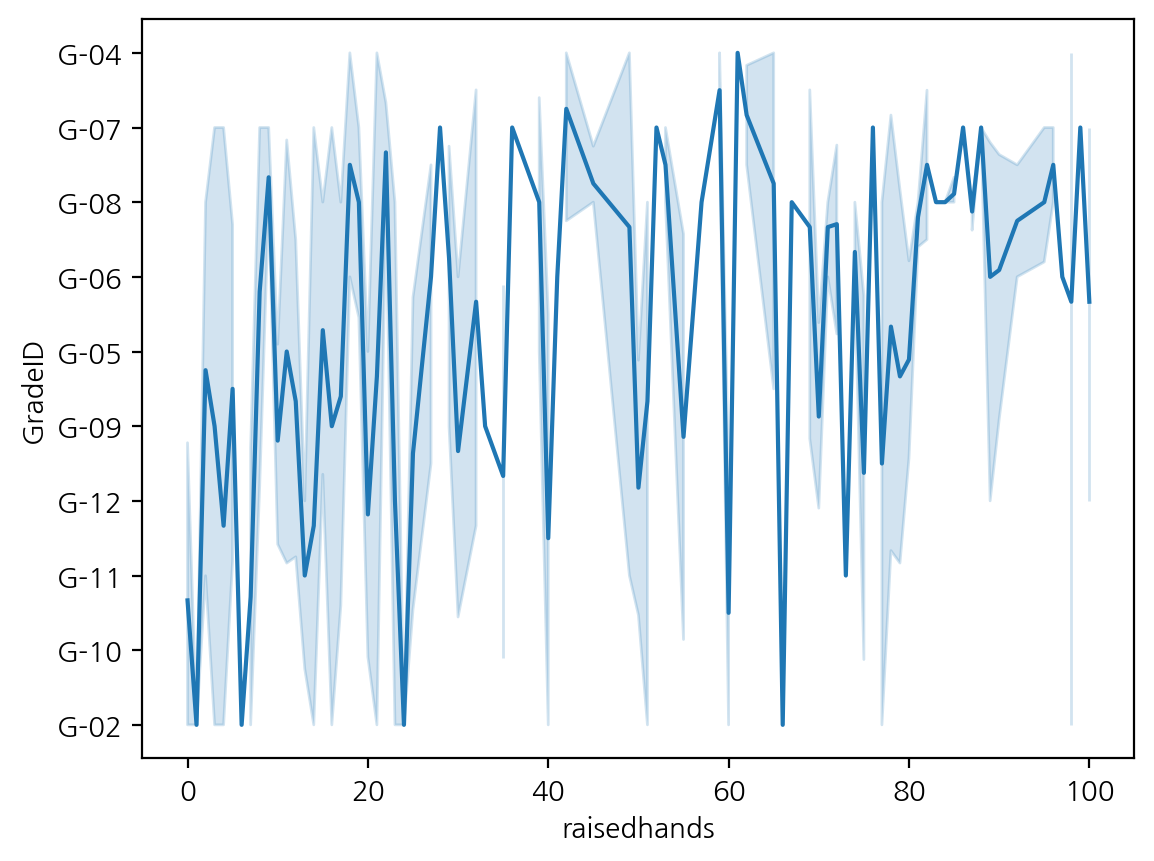

In [9]:
# 손 든 횟수별 성적 등급 시각화
sns.lineplot(data=df, x="raisedhands", y='GradeID')

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

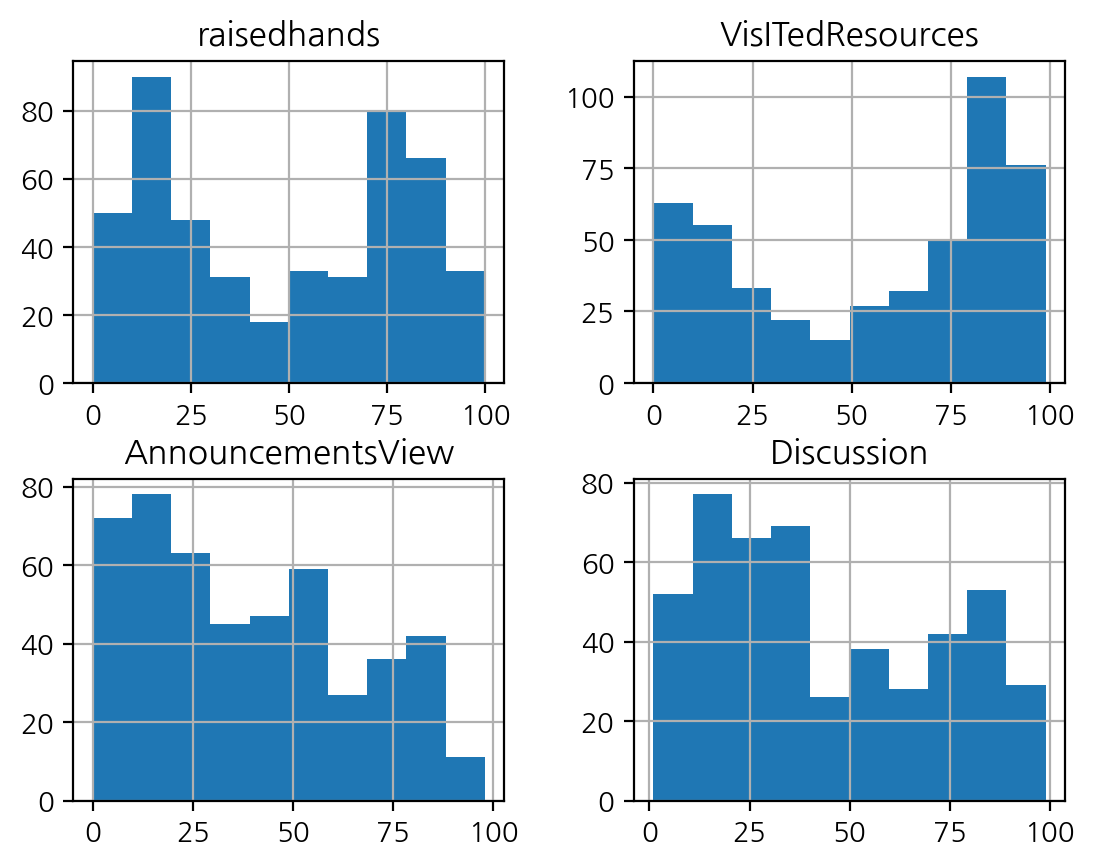

In [10]:
df.hist()

Text(0.5, 1.0, 'class별 남성 여성 수')

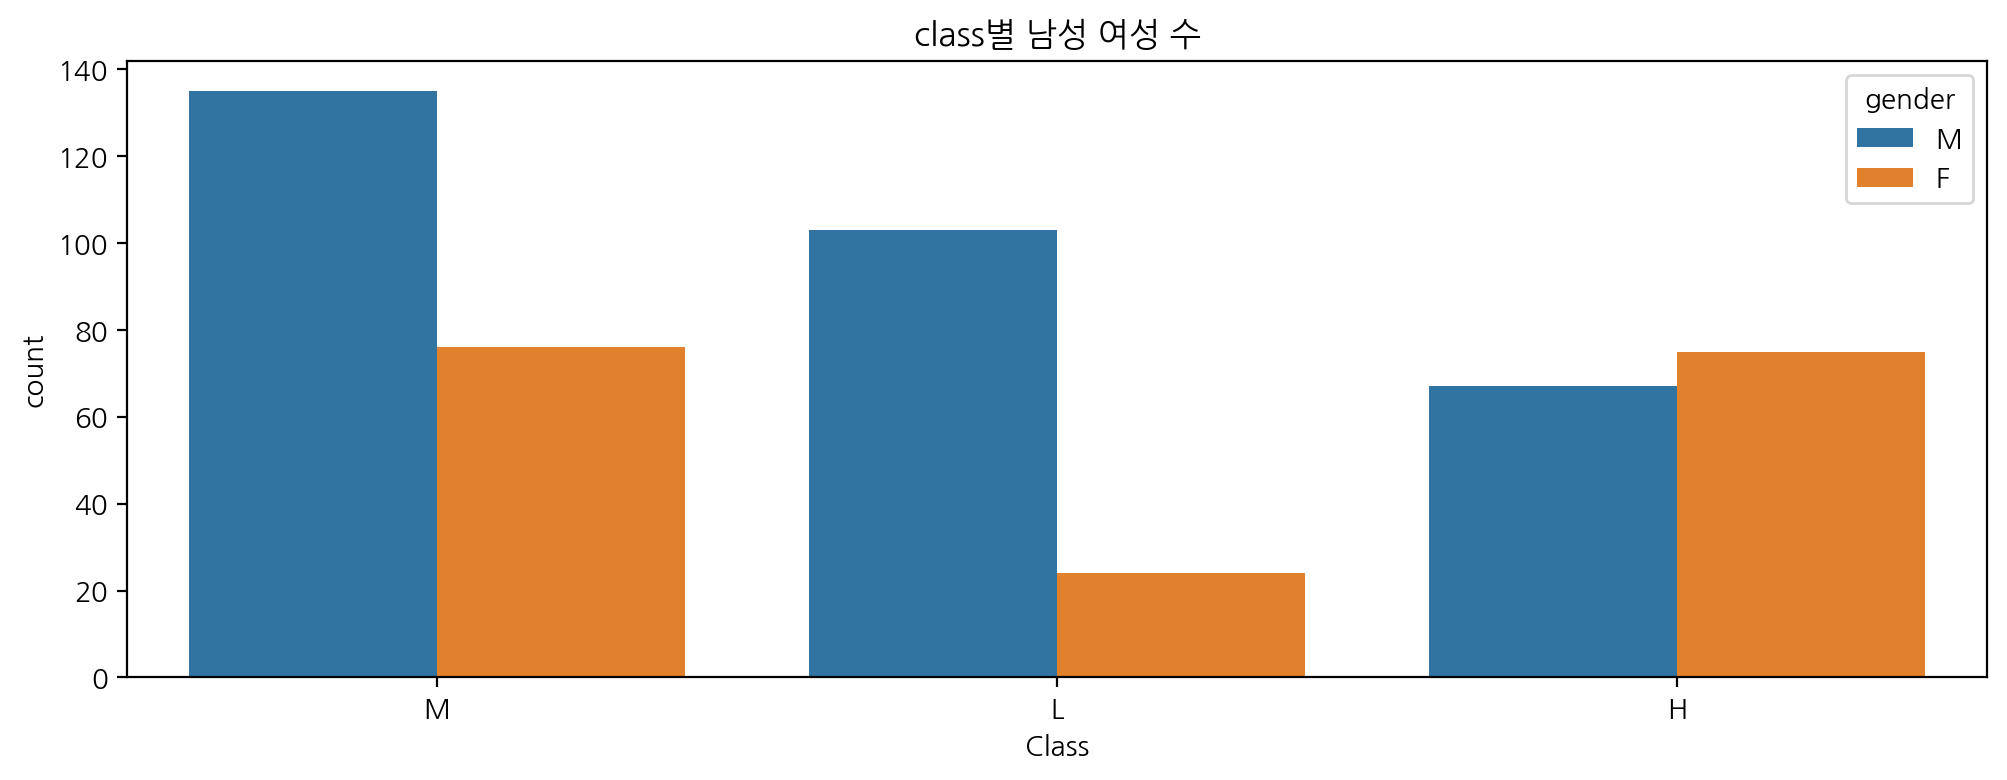

In [11]:
# 클래스별 남성 여성 수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Class", hue='gender').set_title("class별 남성 여성 수")

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

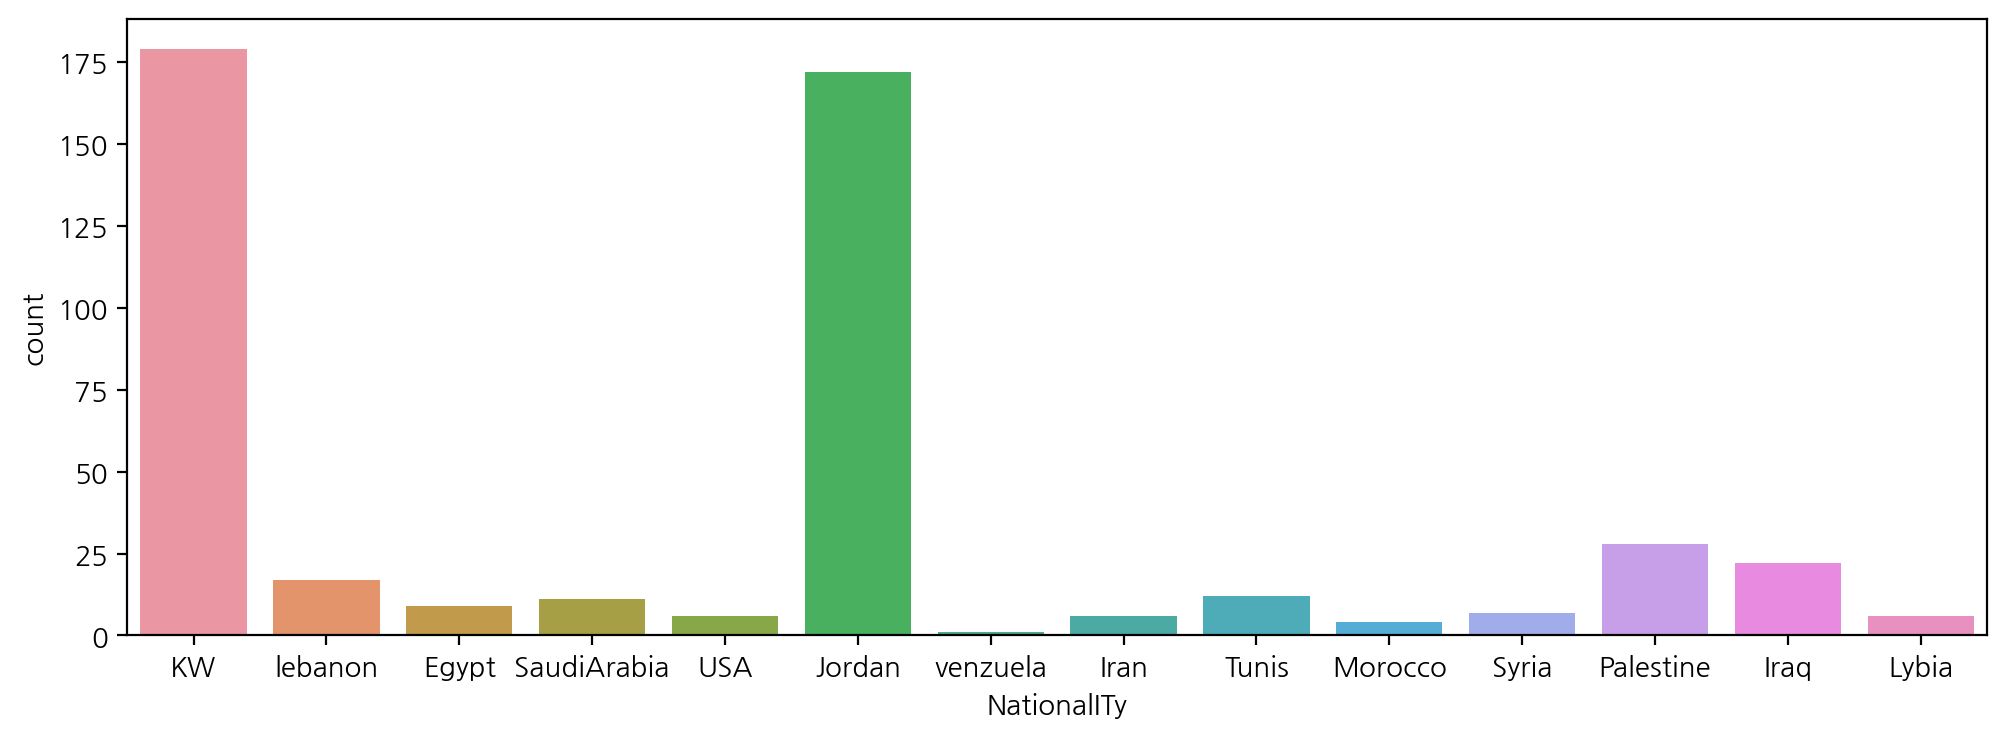

In [12]:
# 학생의 국적 빈도수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='NationalITy')

<AxesSubplot:xlabel='GradeID', ylabel='count'>

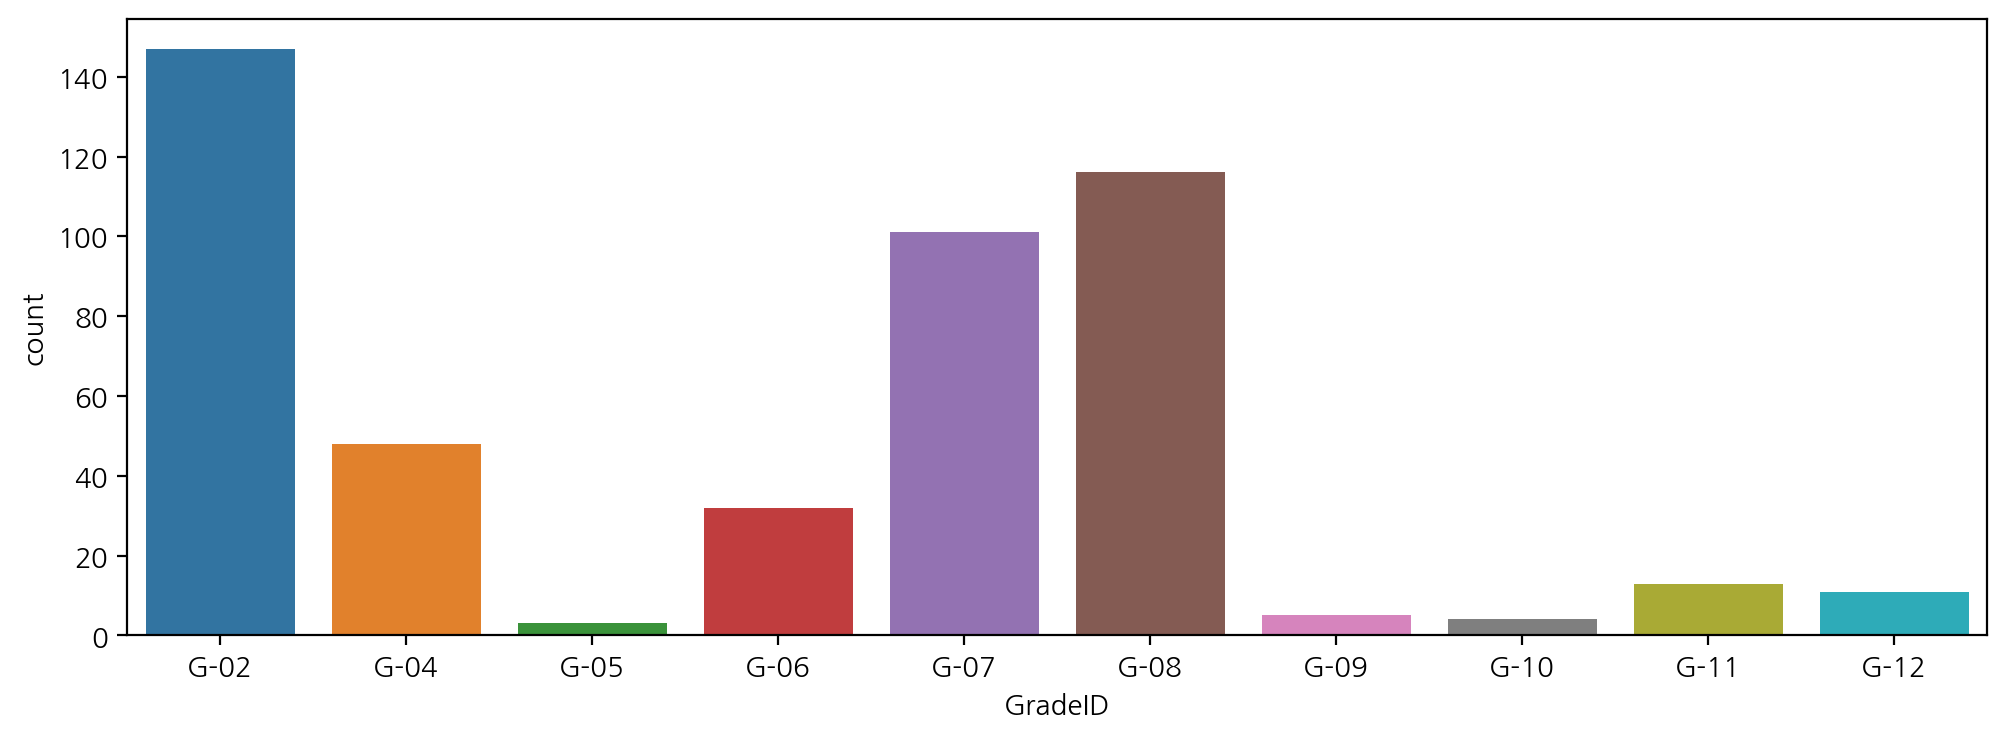

In [13]:
# Grade별 횟수
Grade = df['GradeID'].sort_values()
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=Grade)

<AxesSubplot:xlabel='GradeID', ylabel='count'>

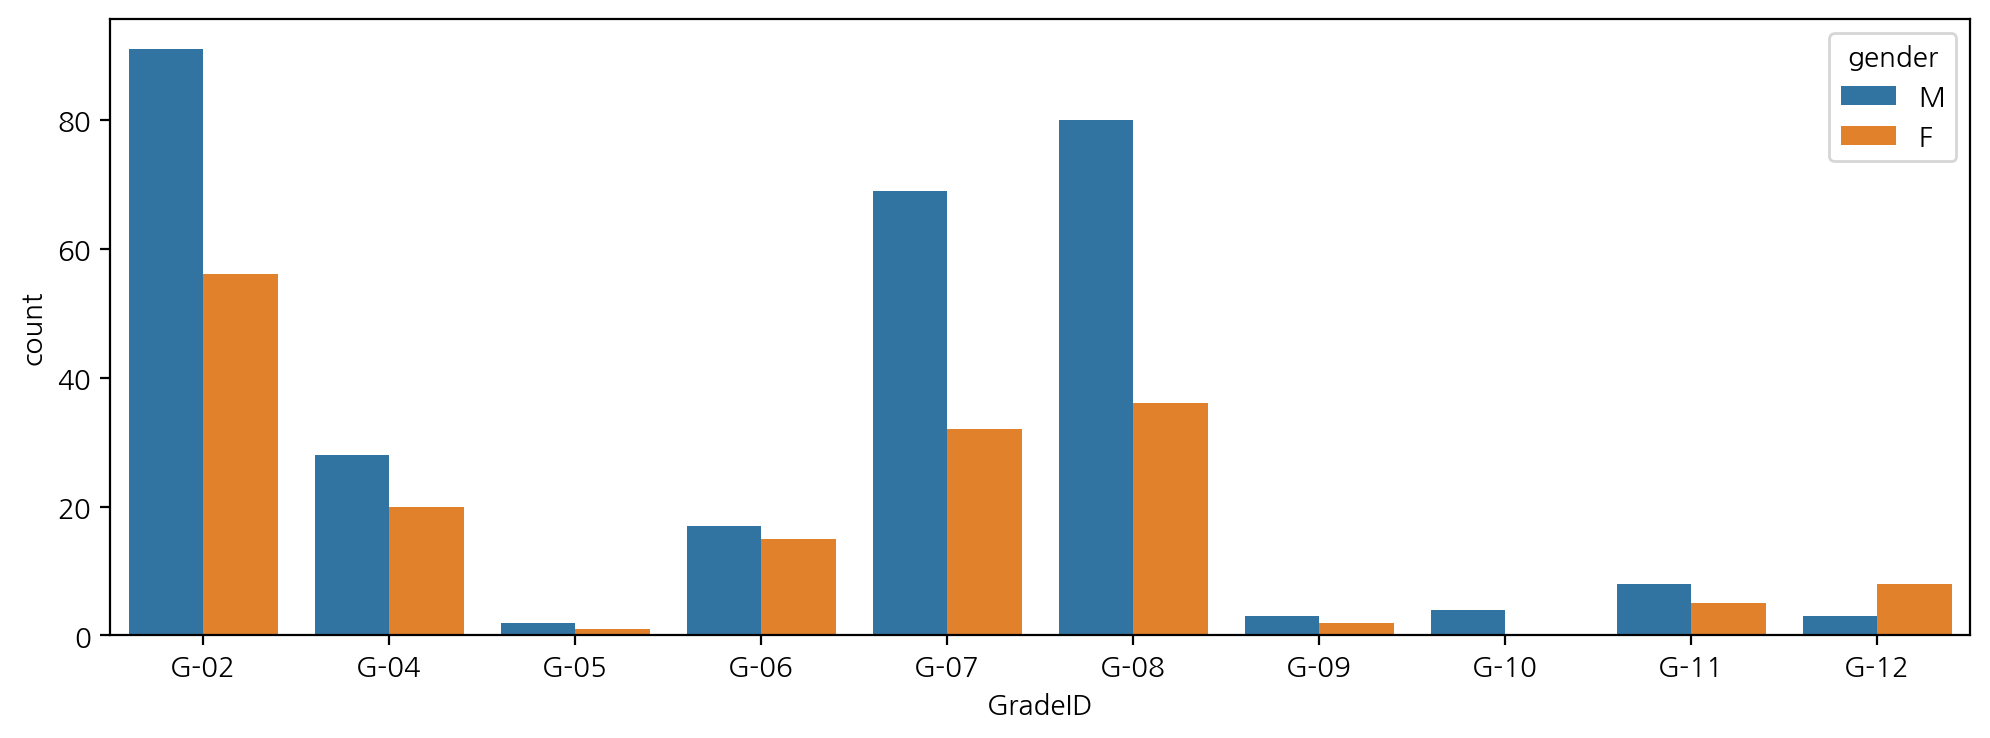

In [14]:
# 성별에 따른 등급
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=Grade, hue='gender')

<AxesSubplot:xlabel='Topic', ylabel='count'>

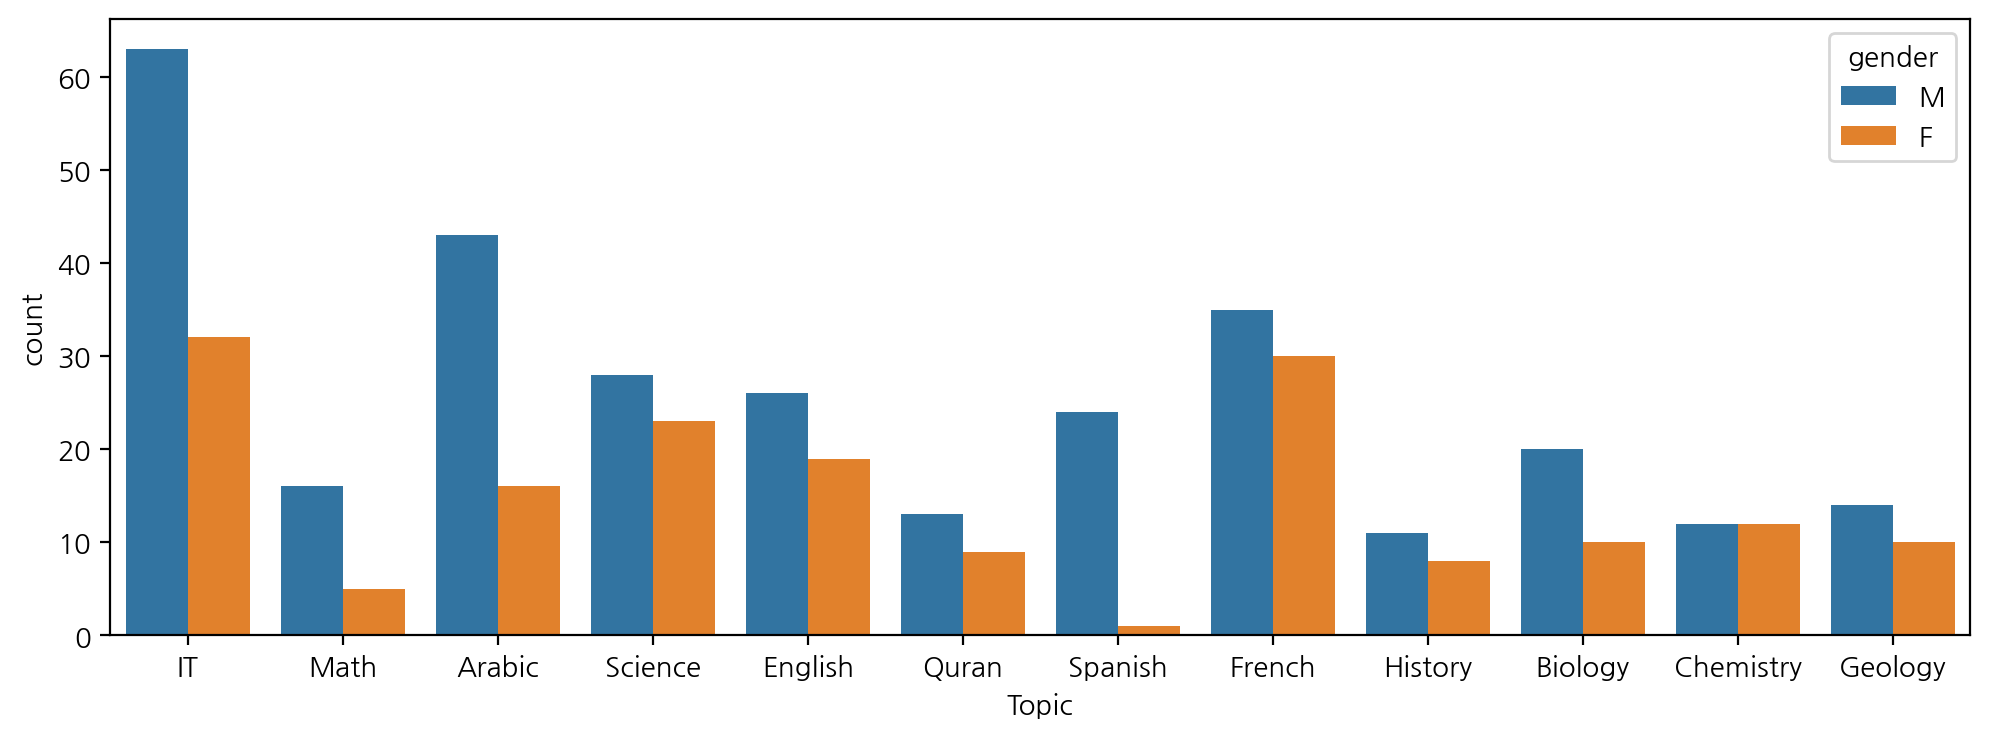

In [15]:
# 성별에 따른 수강과목 수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Topic', hue='gender')

<AxesSubplot:xlabel='Relation', ylabel='count'>

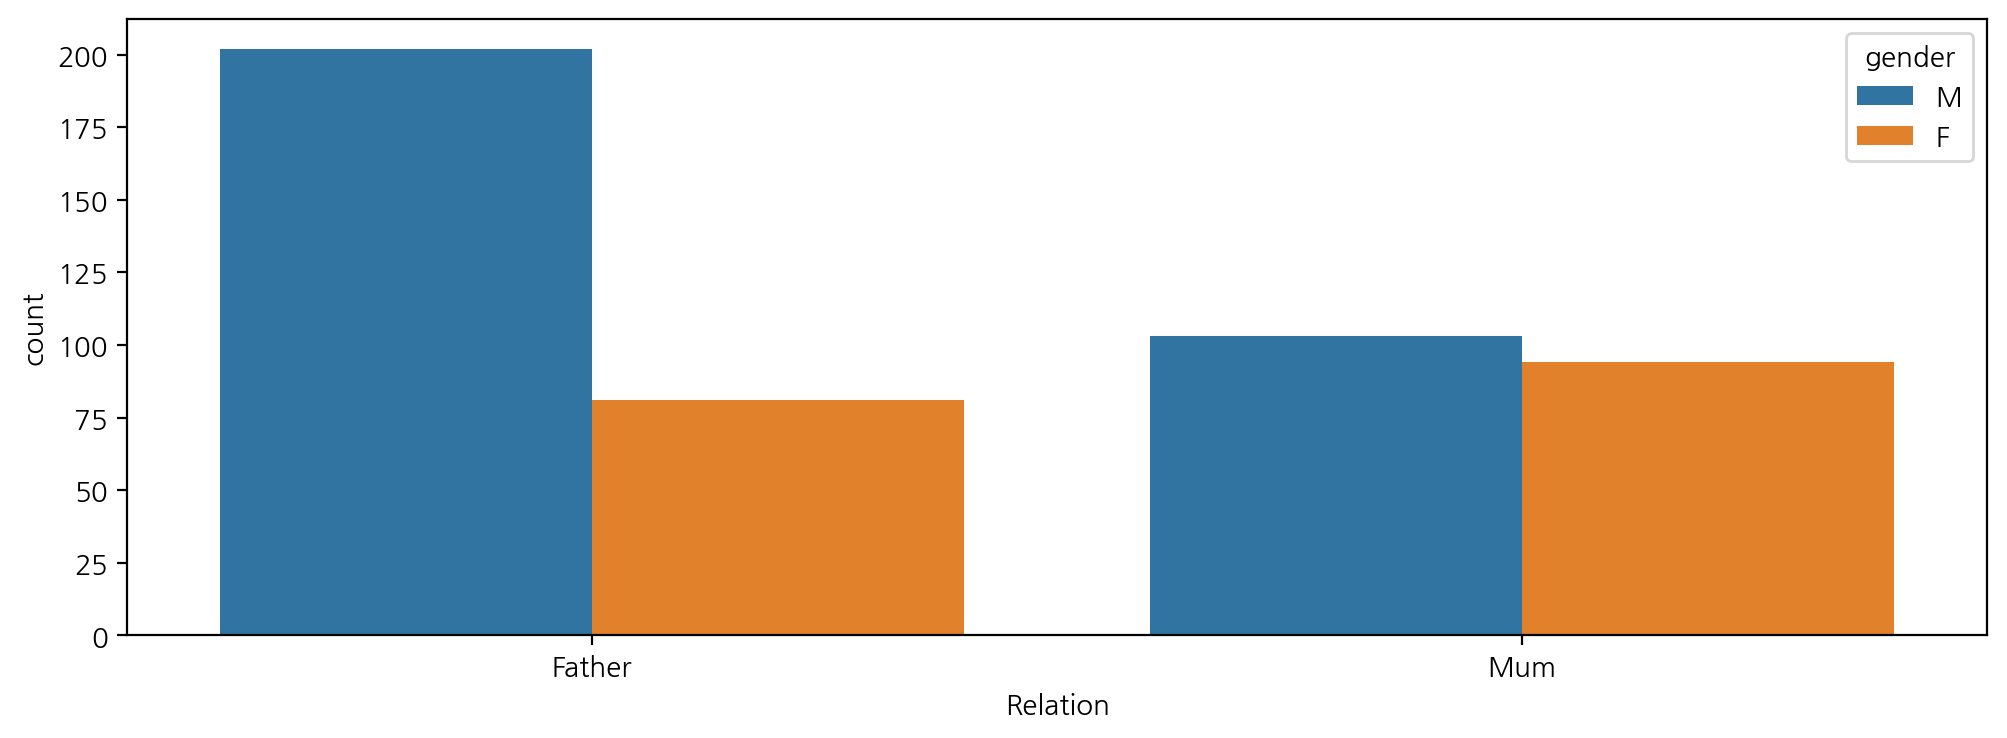

In [16]:
# 셩별에 따른 보호자-학생의 관계
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Relation', hue='gender')

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

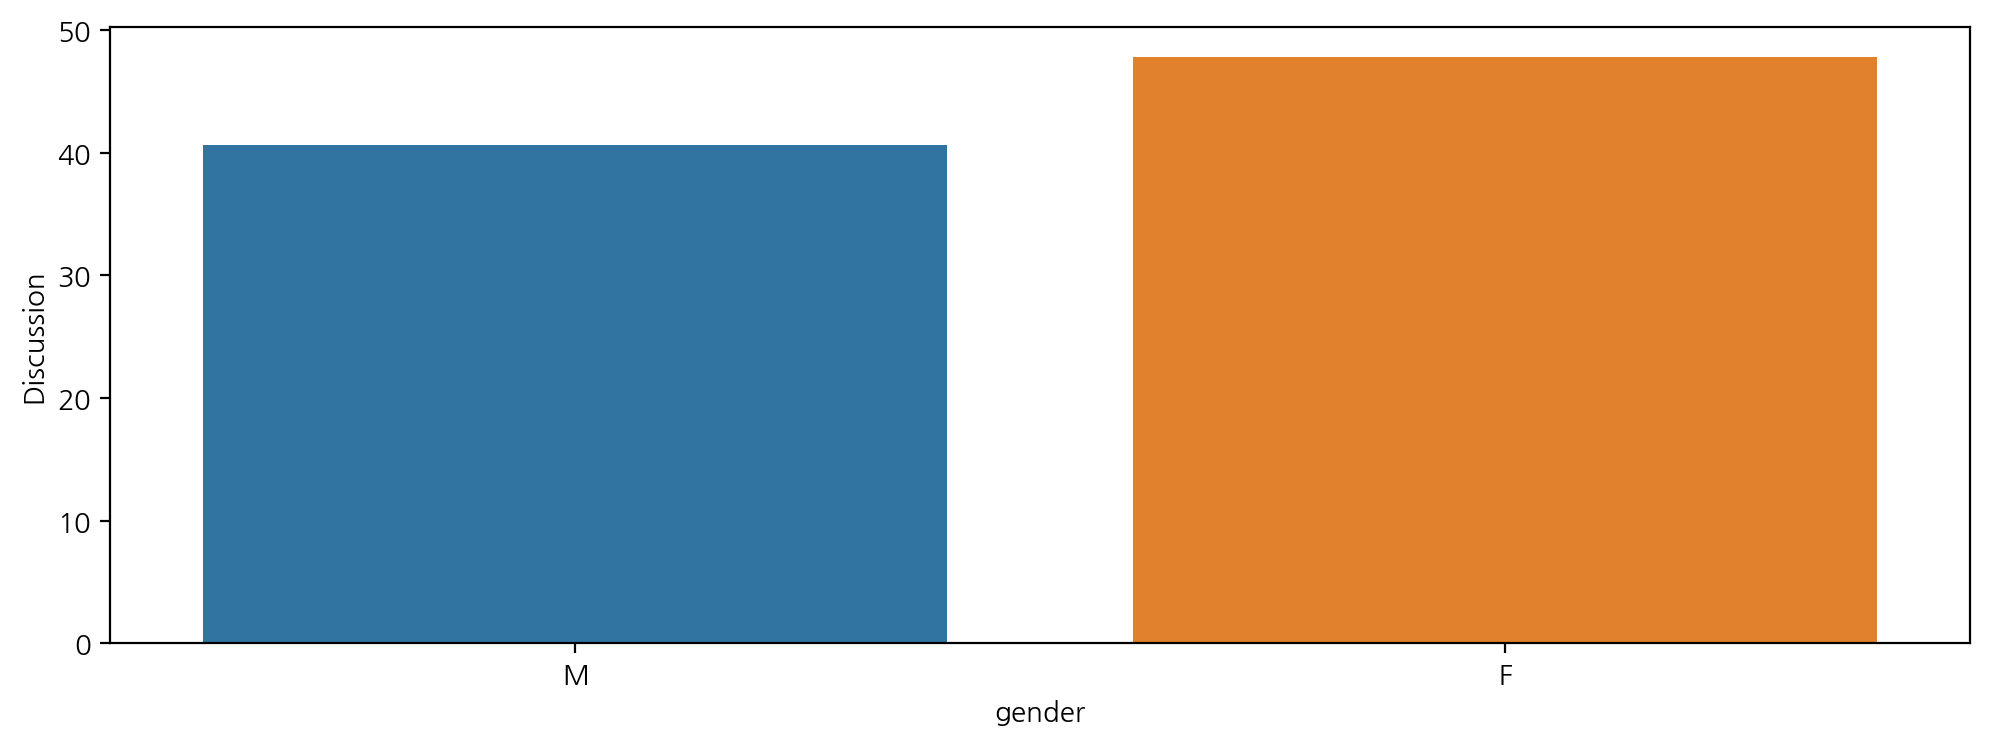

In [17]:
# 성별 토론 참여 횟수 
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='Discussion', x='gender', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

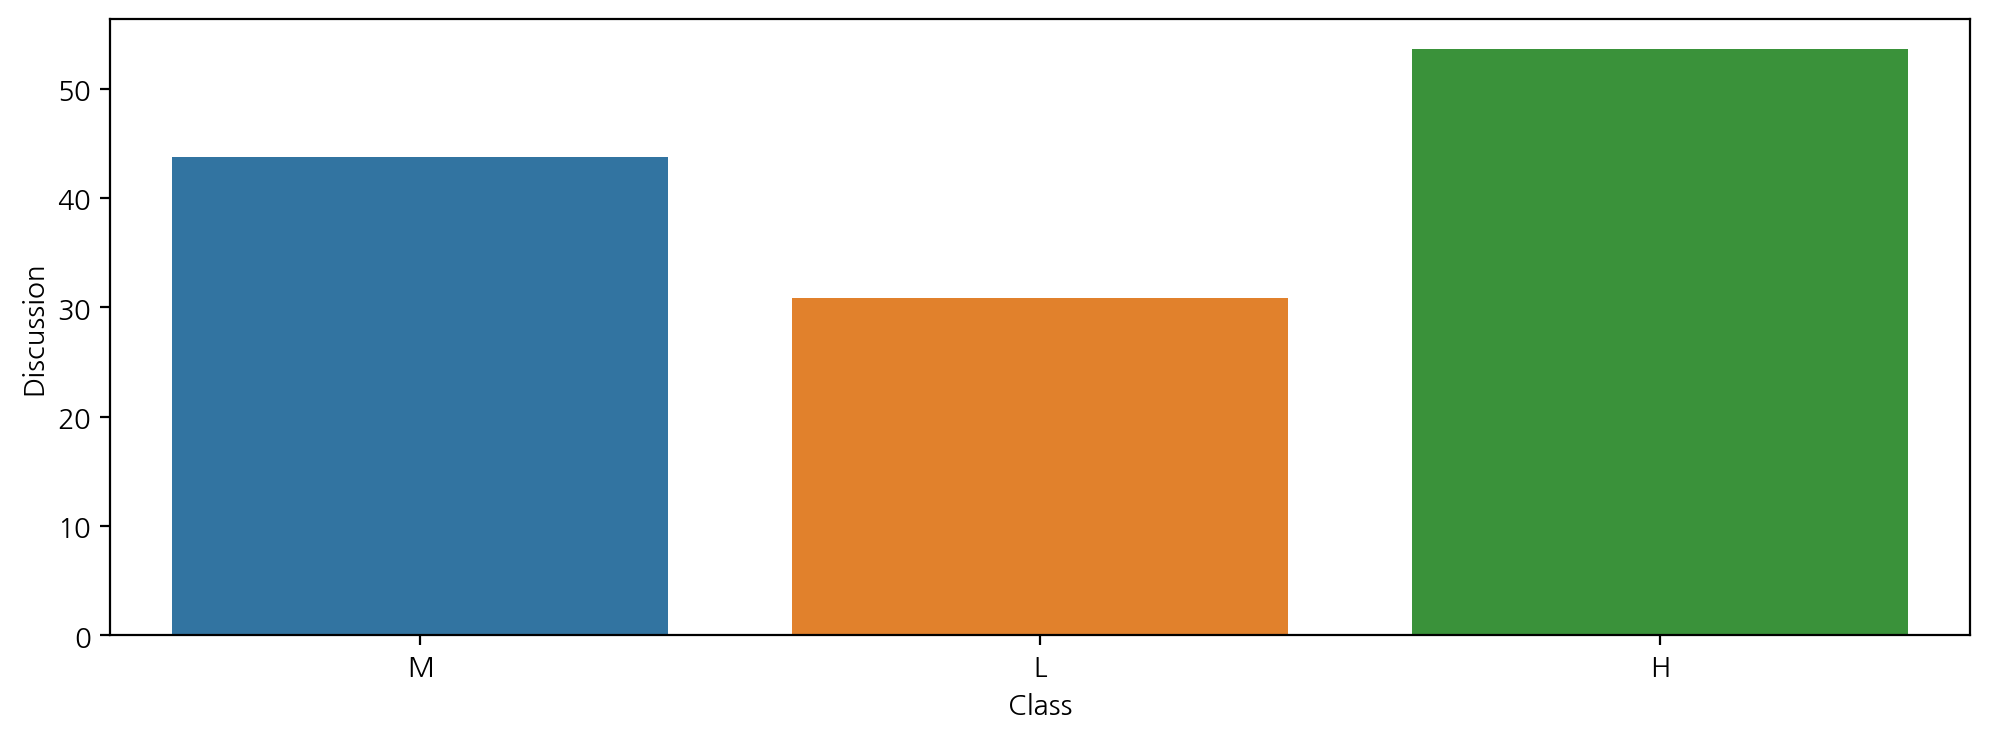

In [18]:
# Class별 토론 참여 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='Discussion', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

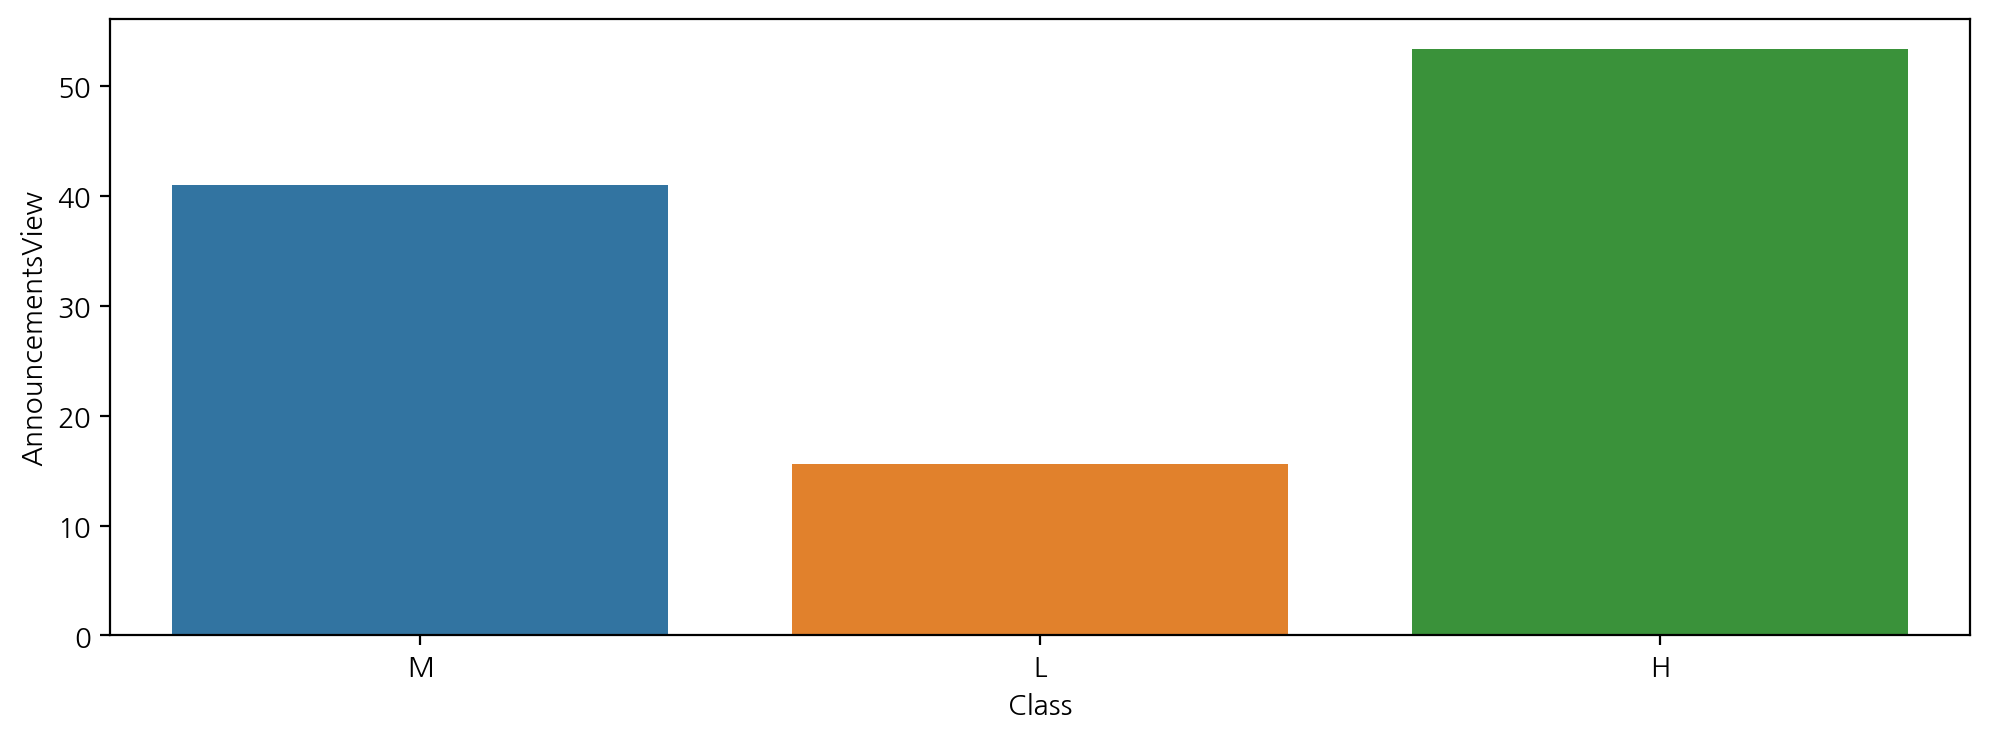

In [19]:
# Class별 과목 공지 확인 횟수 
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='AnnouncementsView', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

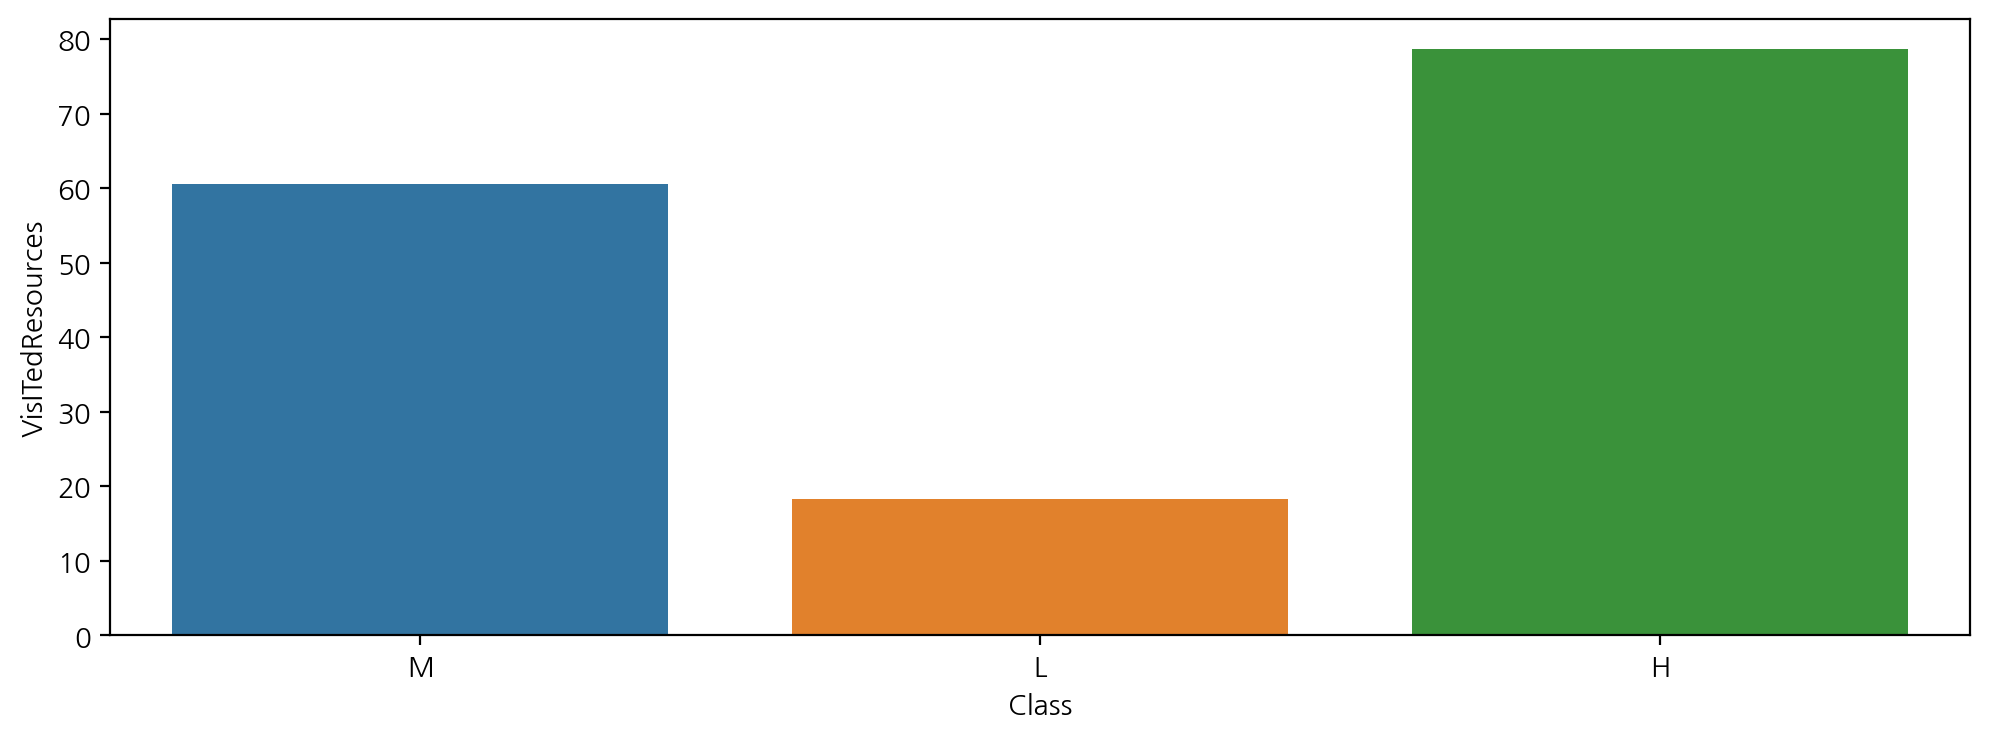

In [20]:
# Class별 코스 컨텐츠에 들어온 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='VisITedResources', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

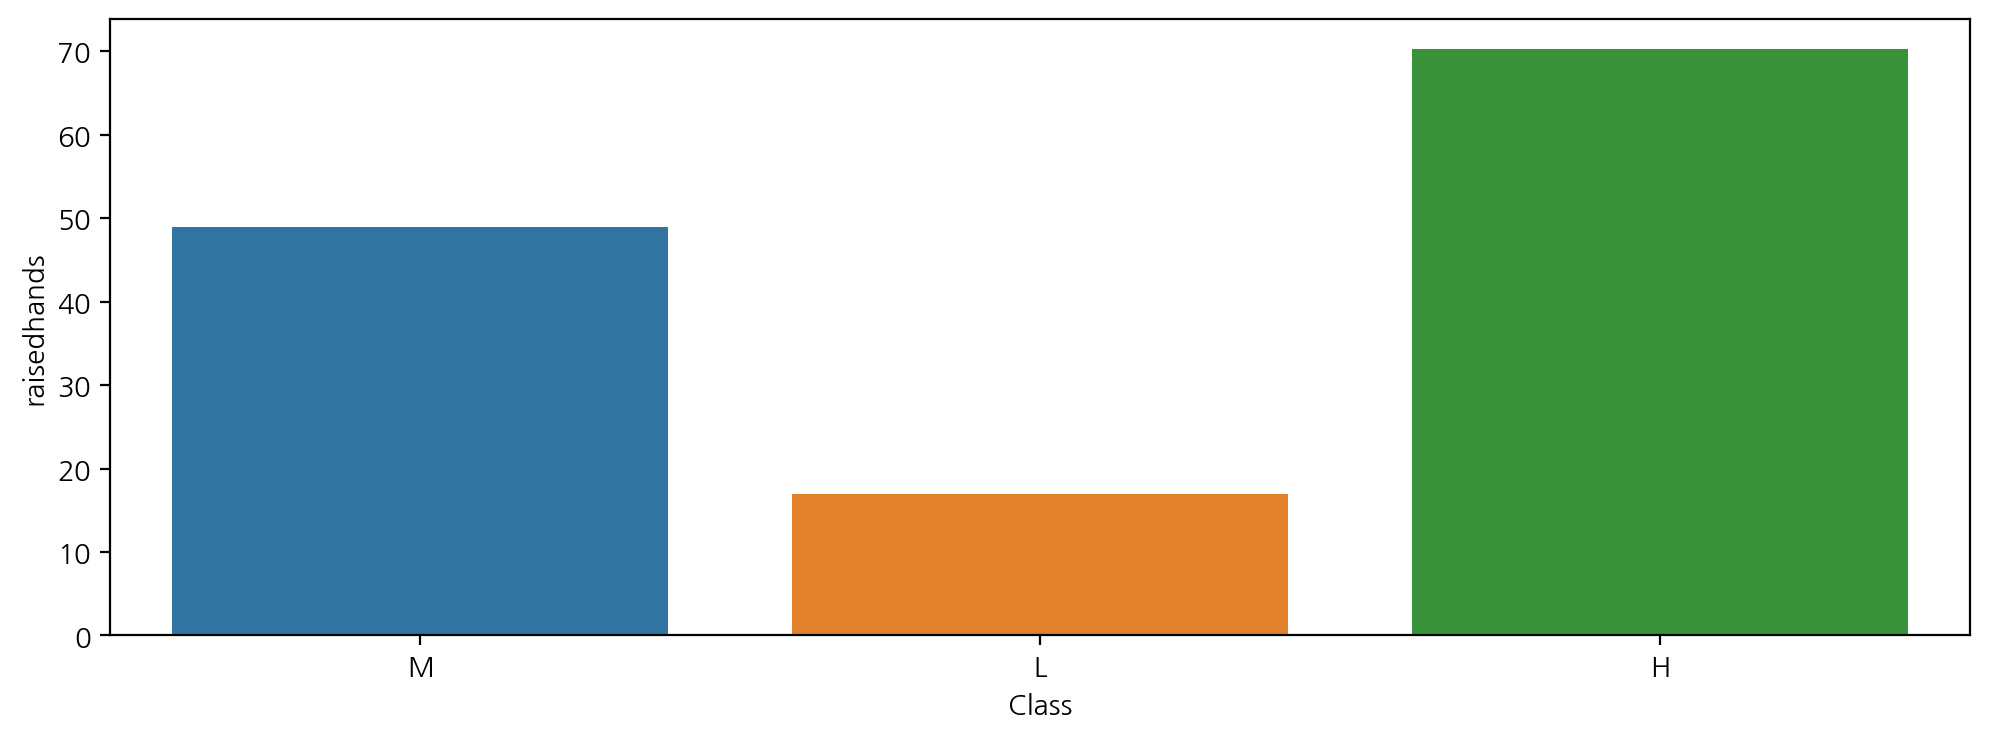

In [21]:
# Class별 수업 중 손 든 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='raisedhands', x='Class', errorbar=None)

## Feature Engineering

In [22]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [23]:
df['NationalITy'] = df['NationalITy'].str.replace('KW', 'KuwaIT')
df['NationalITy'] 

0      KuwaIT
1      KuwaIT
2      KuwaIT
3      KuwaIT
4      KuwaIT
        ...  
475    Jordan
476    Jordan
477    Jordan
478    Jordan
479    Jordan
Name: NationalITy, Length: 480, dtype: object

In [24]:
class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
df = df.replace({"Class" : class_dict})


In [25]:
df['immigration'] = df["NationalITy"] != df['PlaceofBirth']
df['immigration']
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,immigration
0,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,0,False
1,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,0,False
2,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,-1,False
3,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,-1,False
4,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,0,False


In [26]:
df[['gender', 'immigration', 'StageID',
    'Topic', 'Relation', 'raisedhands',
    'VisITedResources', 'AnnouncementsView',
    'Discussion', 'StudentAbsenceDays', 'Class']]

,gender,immigration,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,False,lowerlevel,IT,Father,15,16,2,20,Under-7,0
1,M,False,lowerlevel,IT,Father,20,20,3,25,Under-7,0
2,M,False,lowerlevel,IT,Father,10,7,0,30,Above-7,-1
3,M,False,lowerlevel,IT,Father,30,25,5,35,Above-7,-1
4,M,False,lowerlevel,IT,Father,40,50,12,50,Above-7,0
...,...,...,...,...,...,...,...,...,...,...,...
475,F,False,MiddleSchool,Chemistry,Father,5,4,5,8,Above-7,-1
476,F,False,MiddleSchool,Geology,Father,50,77,14,28,Under-7,0
477,F,False,MiddleSchool,Geology,Father,55,74,25,29,Under-7,0
478,F,False,MiddleSchool,History,Father,30,17,14,57,Above-7,-1


In [55]:
label_name = "Class"
label_name

'Class'

In [56]:
feature_names = pd.get_dummies(df[['gender', 'immigration', 'StageID',
    'Topic', 'Relation', 'raisedhands',
    'VisITedResources', 'AnnouncementsView',
    'Discussion', 'StudentAbsenceDays']])
feature_names.head()

,immigration,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Relation_Father,Relation_Mum,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,False,15,16,2,20,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,False,20,20,3,25,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,False,10,7,0,30,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,False,30,25,5,35,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,False,40,50,12,50,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [59]:
from sklearn.model_selection import train_test_split

X = feature_names
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train

,immigration,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Relation_Father,Relation_Mum,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
132,False,0,3,10,3,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
228,False,73,84,77,81,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
473,False,85,88,79,70,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
42,False,10,12,7,33,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
360,False,20,88,31,28,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,12,26,7,40,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
270,False,90,84,52,30,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
348,False,20,3,9,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
435,False,79,88,79,20,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [66]:
X_test

,immigration,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Relation_Father,Relation_Mum,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
73,False,19,30,26,19,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
414,False,10,9,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
394,True,78,91,50,40,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
277,True,92,31,42,27,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
399,False,89,92,89,83,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,False,62,61,82,40,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
237,False,72,80,58,66,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
408,False,50,79,10,31,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
25,False,8,7,30,40,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [68]:
y_train

132   -1
228    1
473    0
42    -1
360    0
      ..
106    0
270    1
348   -1
435    0
102   -1
Name: Class, Length: 384, dtype: int64

In [69]:
y_test

73     0
414   -1
394    1
277    1
399    1
      ..
222    0
237    0
408    0
25    -1
419    1
Name: Class, Length: 96, dtype: int64

In [106]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

In [108]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

In [109]:
y_predict = model.predict(X_test)

In [112]:
(y_test == y_predict).mean()

0.8541666666666666

In [101]:
max_depth = list(range(3, 20, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
parameters = {"max_depth" : max_depth, "max_features" : max_features}
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]}

In [102]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5, scoring="accuracy", verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.2s
[CV] END ......................max_depth=3, max

[CV] END ......................max_depth=9, max_features=0.9; total time=   0.4s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.3; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.3; total time=   0.4s
[CV] END .....................max_depth=11, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.8; total time=   0.3s
[CV] END ...................

[CV] END .....................max_depth=19, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.4s
[CV] END .....................max_depth=19, max_features=0.9; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.4s
[CV] END .....................max_depth=19, max_features=0.9; total time=   0.3s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, max_features=0.9,
                                              min_samples_leaf=3, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=2)

In [103]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

In [104]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([-1, -1,  1,  0,  1])

In [114]:
model.feature_importances_

array([0.00974819, 0.13360609, 0.26569152, 0.1238721 , 0.08705028,
       0.01511176, 0.01680828, 0.00073052, 0.01102043, 0.01054188,
       0.00533598, 0.00128066, 0.00517051, 0.00509868, 0.00733145,
       0.00632329, 0.00107779, 0.00645205, 0.00462568, 0.00243188,
       0.00124314, 0.00030619, 0.03273171, 0.02857867, 0.11573809,
       0.10209322])

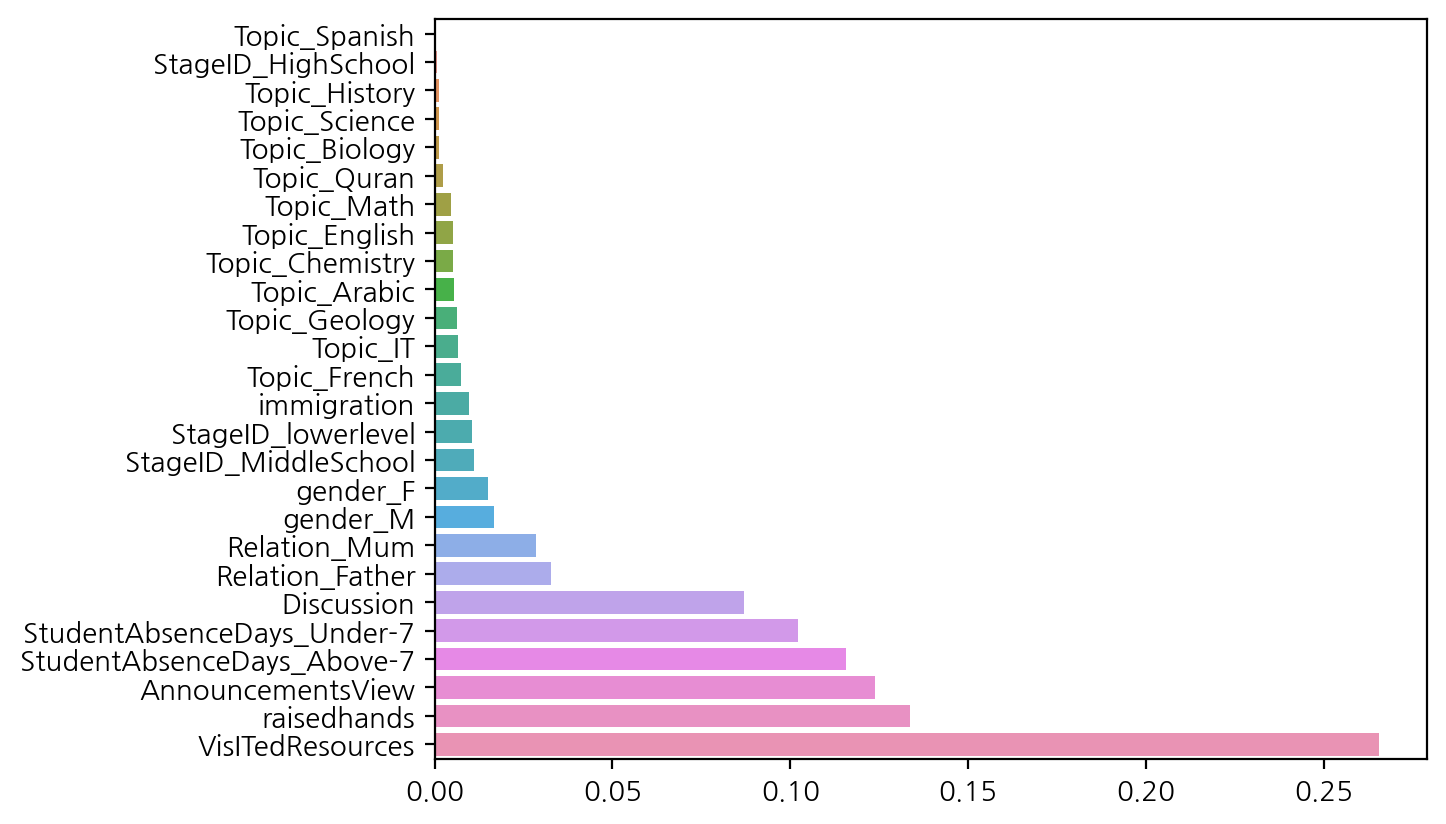

In [115]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi = fi.sort_values()

sns.barplot(x=fi, y=fi.index);

In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8541666666666666